# Time series analysis and modelling using ARIMA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Load the data

data = pd.read_csv('stocks_data.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03 00:00:00-05:00,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04 00:00:00-05:00,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05 00:00:00-05:00,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06 00:00:00-05:00,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07 00:00:00-05:00,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...,...
4899,2019-06-25 00:00:00-04:00,2945.780029,2946.520020,2916.010010,2917.379883,2917.379883,3578050000
4900,2019-06-26 00:00:00-04:00,2926.070068,2932.590088,2912.989990,2913.780029,2913.780029,3478130000
4901,2019-06-27 00:00:00-04:00,2919.659912,2929.300049,2918.570068,2924.919922,2924.919922,3122920000
4902,2019-06-28 00:00:00-04:00,2932.939941,2943.979980,2929.050049,2941.760010,2941.760010,5420700000


In [3]:
# Parse the dates to remove hours

data['Date'] = data['Date'].apply(lambda x: x[:11])
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2019-06-25,2945.780029,2946.520020,2916.010010,2917.379883,2917.379883,3578050000
2019-06-26,2926.070068,2932.590088,2912.989990,2913.780029,2913.780029,3478130000
2019-06-27,2919.659912,2929.300049,2918.570068,2924.919922,2924.919922,3122920000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4904 entries, 2000-01-03 to 2019-07-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4904 non-null   float64
 1   High       4904 non-null   float64
 2   Low        4904 non-null   float64
 3   Close      4904 non-null   float64
 4   Adj Close  4904 non-null   float64
 5   Volume     4904 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 268.2 KB


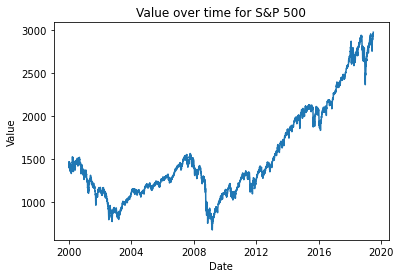

In [5]:
plt.plot(data['Open'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Value over time for S&P 500')
plt.show()

In [6]:
# Fill the dataset with values for days when stock is closed

data = data.asfreq(freq='D', method='ffill')
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2019-06-27,2919.659912,2929.300049,2918.570068,2924.919922,2924.919922,3122920000
2019-06-28,2932.939941,2943.979980,2929.050049,2941.760010,2941.760010,5420700000
2019-06-29,2932.939941,2943.979980,2929.050049,2941.760010,2941.760010,5420700000


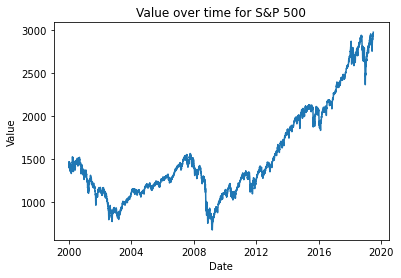

In [7]:
plt.plot(data['Open'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Value over time for S&P 500')
plt.show()

In [8]:
data['first_diff'] = data['Open'].diff()
data.drop(index=data.index[0],
         axis=0,
         inplace=True)
data

,Open,High,Low,Close,Adj Close,Volume,first_diff
Date,,,,,,,
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,-14.030029
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,-55.799927
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,2.689941
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,1.339966
2000-01-08,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,0.000000
...,...,...,...,...,...,...,...
2019-06-27,2919.659912,2929.300049,2918.570068,2924.919922,2924.919922,3122920000,-6.410156
2019-06-28,2932.939941,2943.979980,2929.050049,2941.760010,2941.760010,5420700000,13.280029
2019-06-29,2932.939941,2943.979980,2929.050049,2941.760010,2941.760010,5420700000,0.000000


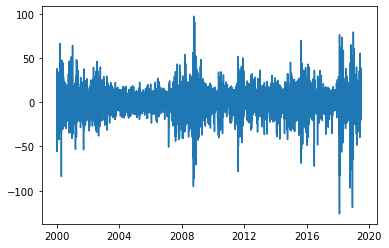

In [9]:
plt.plot(data['first_diff'])
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
adfuller(data['first_diff'])

(-19.439816690716167,
 0.0,
 20,
 7098,
 {'1%': -3.43127162108596,
  '5%': -2.861947283361622,
  '10%': -2.5669867928635224},
 56206.391034663684)

In [12]:
adfuller(data['Open'])

(1.153445084372758,
 0.9956479078584245,
 21,
 7097,
 {'1%': -3.431271750993633,
  '5%': -2.861947340761599,
  '10%': -2.5669868234184925},
 56207.065970897245)

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

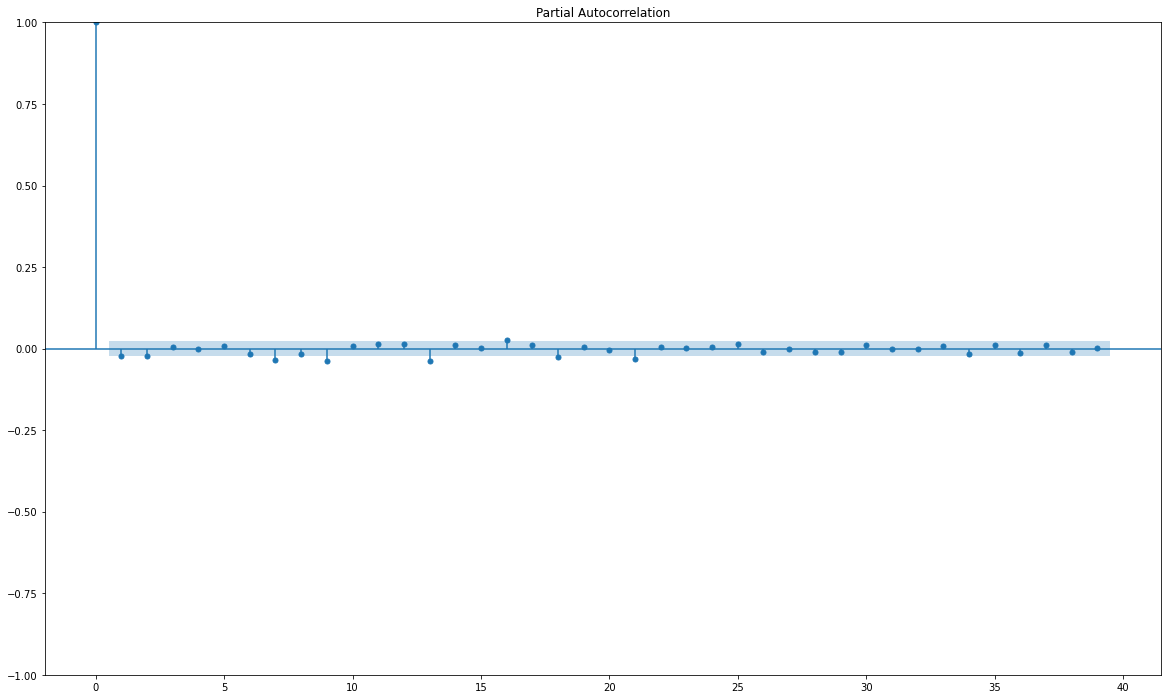

In [14]:
fig, ax = plt.subplots(figsize=(20, 12))
plot_pacf(data['first_diff'], method='ywm', ax=ax)
plt.show()

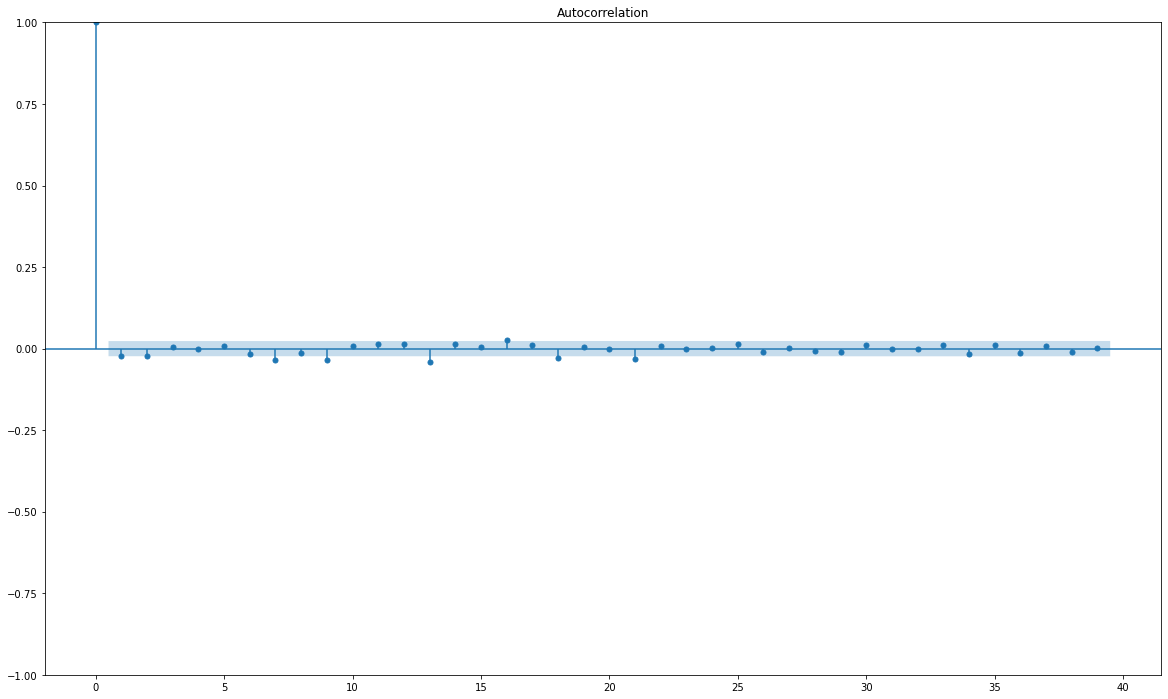

In [15]:
fig, ax = plt.subplots(figsize=(20, 12))
plot_acf(data['first_diff'], ax)
plt.show()

In [16]:
train_data = data['2000-01-03': '2019-05-16']
train_data

,Open,High,Low,Close,Adj Close,Volume,first_diff
Date,,,,,,,
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,-14.030029
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,-55.799927
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,2.689941
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,1.339966
2000-01-08,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,0.000000
...,...,...,...,...,...,...,...
2019-05-12,2863.100098,2891.310059,2825.389893,2881.399902,2881.399902,3529600000,0.000000
2019-05-13,2840.189941,2840.189941,2801.429932,2811.870117,2811.870117,3894030000,-22.910156
2019-05-14,2820.120117,2852.540039,2820.120117,2834.409912,2834.409912,3322720000,-20.069824


In [17]:
test_data = data['2019-05-17': '2019-07-01']
test_data.head()

,Open,High,Low,Close,Adj Close,Volume,first_diff
Date,,,,,,,
2019-05-17,2858.600098,2885.479980,2854.229980,2859.530029,2859.530029,3257950000,2.800049
2019-05-18,2858.600098,2885.479980,2854.229980,2859.530029,2859.530029,3257950000,0.000000
2019-05-19,2858.600098,2885.479980,2854.229980,2859.530029,2859.530029,3257950000,0.000000
2019-05-20,2841.939941,2853.860107,2831.290039,2840.229980,2840.229980,3288870000,-16.660156
2019-05-21,2854.020020,2868.879883,2854.020020,2864.360107,2864.360107,3218700000,12.080078


In [20]:
from statsmodels.tsa.arima.model import ARIMA

In [79]:
model = ARIMA(train_data['Open'], order=(5, 1, 1))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                 7073
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -28066.450
Date:                Wed, 12 Oct 2022   AIC                          56146.901
Time:                        18:38:25   BIC                          56194.948
Sample:                    01-04-2000   HQIC                         56163.448
                         - 05-16-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2497      0.617     -0.405      0.686      -1.459       0.960
ar.L2         -0.0287      0.018     -1.584      0.113      -0.064       0.007
ar.L3         -0.0024      0.016     -0.143      0.886      -0.035       0.030
ar.L4          0.0005      0.008      0.064      0.949      -0.015       0.016
ar.L5          0.0109      0.010      1.111      0.267      -0.008       0.030
ma.L1          0.2233      0.617      0.362      0.718      -0.987       1.433
sigma2       163.9169      1.163    140.883      0.000     161.636     166.197
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             27047.94
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.66   Skew:                            -0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
res.forecast(steps=len(test_data)*10)

2019-05-17    2854.808223
2019-05-18    2853.776423
2019-05-19    2853.759675
2019-05-20    2853.816930
2019-05-21    2854.192450
                 ...     
2020-08-14    2854.093902
2020-08-15    2854.093902
2020-08-16    2854.093902
2020-08-17    2854.093902
2020-08-18    2854.093902
Freq: D, Name: predicted_mean, Length: 460, dtype: float64

Fit a auto-ARIMA model

In [82]:
import pmdarima as pm
from pmdarima import model_selection

In [83]:
modl = pm.auto_arima(train_data['Open'], start_p=0, start_q=0)

In [84]:
modl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7073
Model:               SARIMAX(5, 2, 0)   Log Likelihood              -28626.152
Date:                Wed, 12 Oct 2022   AIC                          57264.304
Time:                        18:47:46   BIC                          57305.487
Sample:                    01-04-2000   HQIC                         57278.488
                         - 05-16-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8561      0.006   -133.317      0.000      -0.869      -0.844
ar.L2         -0.7024      0.009    -79.481      0.000      -0.720      -0.685
ar.L3         -0.5194      0.010    -53.236      0.000      -0.538      -0.500
ar.L4         -0.3394      0.010    -34.198      0.000      -0.359      -0.320
ar.L5         -0.1538      0.007    -21.709      0.000      -0.168      -0.140
sigma2       192.2470      1.434    134.026      0.000     189.436     195.058
===================================================================================
Ljung-Box (L1) (Q):                   2.03   Jarque-Bera (JB):             21363.53
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               1.65   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
# Predicitions using ARIMA model

ser = pd.Series(data=modl.predict(len(test_data)), index=test_data.index)
ser

Date
2019-05-17    2853.138059
2019-05-18    2850.382619
2019-05-19    2848.861227
2019-05-20    2851.067967
2019-05-21    2856.779388
2019-05-22    2862.120518
2019-05-23    2862.976194
2019-05-24    2864.656879
2019-05-25    2867.211531
2019-05-26    2870.354522
2019-05-27    2873.530566
2019-05-28    2876.221159
2019-05-29    2878.575085
2019-05-30    2881.206975
2019-05-31    2883.987787
2019-06-01    2886.780355
2019-06-02    2889.502814
2019-06-03    2892.157153
2019-06-04    2894.819657
2019-06-05    2897.532535
2019-06-06    2900.253913
2019-06-07    2902.962290
2019-06-08    2905.657373
2019-06-09    2908.350205
2019-06-10    2911.050420
2019-06-11    2913.755905
2019-06-12    2916.459372
2019-06-13    2919.159840
2019-06-14    2921.859396
2019-06-15    2924.559964
2019-06-16    2927.261738
2019-06-17    2929.963570
2019-06-18    2932.664750
2019-06-19    2935.365618
2019-06-20    2938.066616
2019-06-21    2940.767856
2019-06-22    2943.469172
2019-06-23    2946.170391
2019-06

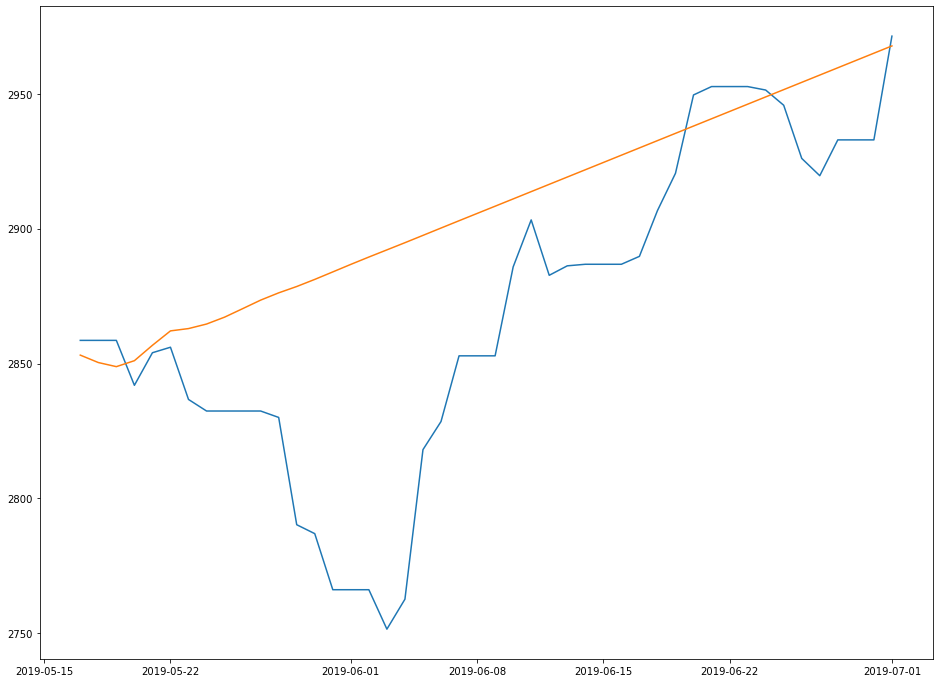

In [94]:
ax = plt.figure(figsize=(16, 12))
plt.plot(test_data['Open'])
plt.plot(ser)
plt.show()